## Initial Value Problem

IVP: Solve the IVP $y'_0(x) = x − 2$, $y(1) = 3.5$ by the Euler method and the 1st order Runge-Kutta method (RK4 is even
better). \
Compare your answer with the true solution.


In [21]:
import numpy as np

def y(x):
    return 1/2*x**2 - 2*x + 5

def f(x):
    return x - 2

def euler(n, x_0, y_0, func, h):
    Y = np.zeros(int(n/h))
    X = np.zeros(int(n/h))
    Y[0] = y_0
    X[0] = x_0
    for i in range(len(X) - 1):
        X[i+1] = X[i] + h
        Y[i+1] = Y[i] + h*func(X[i])
        
    return X, Y

def runge_kutta1(n, x_0, y_0, func, h):
    Y = np.zeros(int(n/h))
    X = np.zeros(int(n/h))
    Y[0] = y_0
    X[0] = x_0
    for i in range(len(X) - 1):
        X[i+1] = X[i] + h
        Y[i+1] = Y[i] + h/2*(func(X[i]) + func(X[i+1]))

    return X, Y

h = 0.01
n = 2
euler_X, euler_Y = euler(n, 1, 3.5, f, h)
Y_true = np.array([y(x) for x in euler_X])
RK_X, RK_Y = runge_kutta1(n, 1, 3.5, f, h)


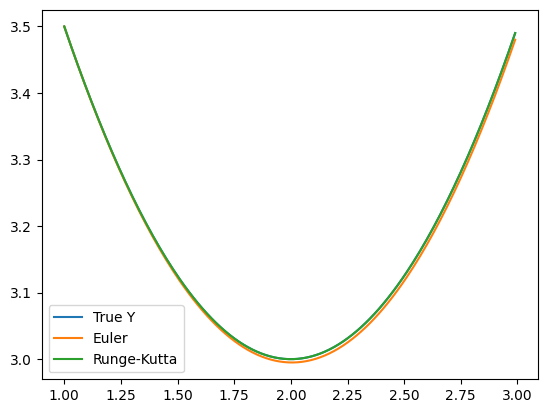

In [22]:
import matplotlib.pyplot as plt

plt.plot(euler_X, Y_true, label = "True Y")
plt.plot(euler_X, euler_Y, label = "Euler")
plt.plot(RK_X, RK_Y, label = "Runge-Kutta")

plt.legend()
plt.show()

## Two Point Boundary Value Problem: Life-Cycle Consumption

TPBVP: Solve the life-cycle consumption exercise by the shooting method. \
Compare your answer with the true solution. Use the following parameters: \
$
\rho = .05, r = .06, a_0 = 1, a^T = 0.
$

In [3]:
import numpy as np

p = 0.05
r = 0.06
a0 = 1
aT = 0
tresh = 0.0001
h = 0.001
n = 100

def life_cycle_consumption(p, r, a, c):
    a_prime = r*a - c
    c_prime = (r - p)*c
    return a_prime, c_prime

def shoot_life_cycle_consumption(p, r, a0, aT, n, h, tresh):
    at = np.ones(int(n/h))
    ct = np.ones(int(n/h))
    c_l = 0
    c_r = a0
    c0 = (c_l + c_r)/2
    j = 0
    while abs(at[-1] - aT) >= tresh:
        j += 1
        at[0] = a0
        ct[0] = c0
        for i in range(len(at) - 1):
            a_prime, c_prime = life_cycle_consumption(p, r, at[i], ct[i])
            ct[i+1] = ct[i] + h*c_prime
            at[i+1] = at[i] + h*a_prime
            
        
        if(at[-1] - aT > tresh):
            c_l = c0
        elif(at[-1] - aT < tresh):
            c_r = c0
        c0 = (c_l + c_r)/2

        print(f"{j}: at[-1]= {at[-1]}, c0 = {c0}")
    
    return f"FINAL: aT = {at[-1]}, c0 = {c0}, cT = {ct[-1]}"

print(shoot_life_cycle_consumption(p, r, a0, aT, n, h, tresh))
    

1: at[-1]= -3602.80546192184, c0 = 0.25
2: at[-1]= -1599.7367380459816, c0 = 0.125
3: at[-1]= -598.2023761080144, c0 = 0.0625
4: at[-1]= -97.43519513903563, c0 = 0.03125
5: at[-1]= 152.94839534545832, c0 = 0.046875
6: at[-1]= 27.75660010321283, c0 = 0.0546875
7: at[-1]= -34.83929751791209, c0 = 0.05078125
8: at[-1]= -3.541348707344703, c0 = 0.048828125
9: at[-1]= 12.1076256979354, c0 = 0.0498046875
10: at[-1]= 4.283138495292128, c0 = 0.05029296875
11: at[-1]= 0.3708948939749448, c0 = 0.050537109375
12: at[-1]= -1.585226906683917, c0 = 0.0504150390625
13: at[-1]= -0.607166006356948, c0 = 0.05035400390625
14: at[-1]= -0.11813555619133714, c0 = 0.050323486328125
15: at[-1]= 0.12637966888547972, c0 = 0.0503387451171875
16: at[-1]= 0.004122056343401076, c0 = 0.05034637451171875
17: at[-1]= -0.05700674992088574, c0 = 0.050342559814453125
18: at[-1]= -0.026442346781889572, c0 = 0.05034065246582031
19: at[-1]= -0.011160145216994438, c0 = 0.050339698791503906
20: at[-1]= -0.0035190444336309734,